In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Checking null values in the dataframe

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Since they are not null values then we can proceed


In [9]:
df['age']=df.Rings+1.5

In [10]:
df.drop('Rings',axis=1,inplace=True)

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [12]:
df.shape

(4177, 9)

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [15]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

In [18]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [30]:
df_nomi=df[['Sex']].copy()

In [31]:
df_nomi.columns

Index(['Sex'], dtype='object')

In [32]:
len(df_nomi)

4177

Using count plot for nominal data

In [33]:
import seaborn as sns

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


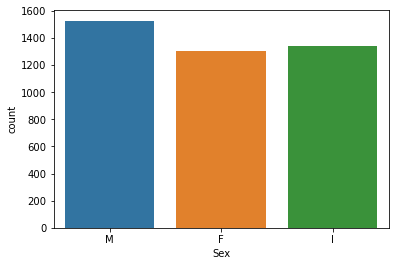

In [35]:
g=sns.countplot(x="Sex",data=df_nomi)
print(df_nomi["Sex"].value_counts())

From the above observation the male abalone present in data are 1528,female abalone present are 1342 and infants are 1307

For ordinal data lets use lineplot

In [36]:
df_ordi=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','age']]

In [37]:
df_ordi.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

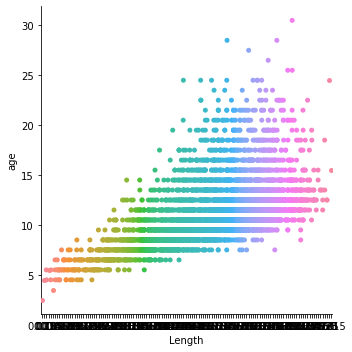

In [41]:
sns.catplot(x='Length',y='age',data=df_ordi)

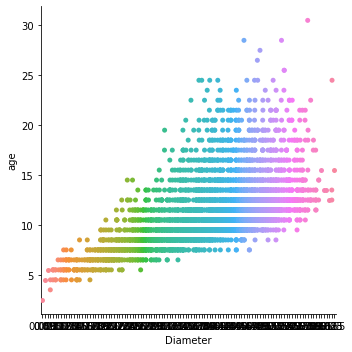

In [42]:
sns.catplot(x='Diameter',y='age',data=df_ordi)

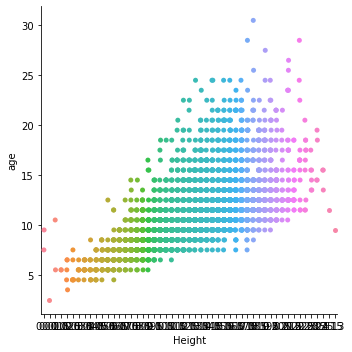

In [51]:
sns.catplot(x='Height',y='age',data=df_ordi)

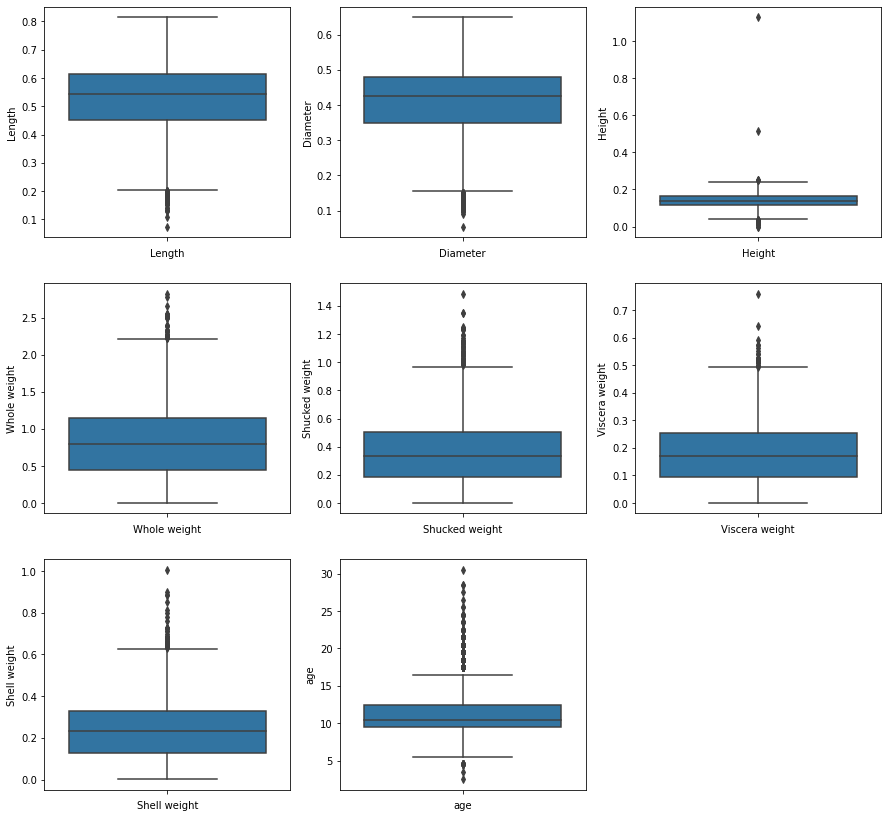

In [54]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df_ordi:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_ordi[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We can observe outliers in Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,shell weight and age.So lets work on removing outliers first

In [55]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','age']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,11.238763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,4.500000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,9.500000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,10.500000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,12.500000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,20.500000


In [56]:
df_ordi=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','age']]

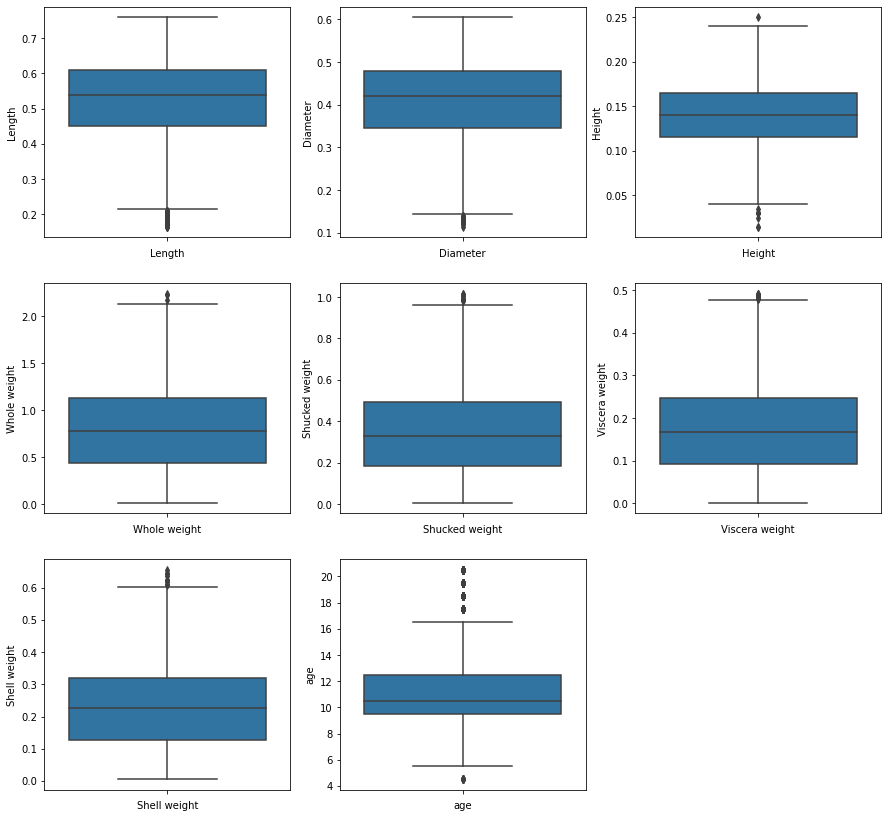

In [57]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df_ordi:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_ordi[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

By observing most of the outliers are removed,We could remove the other outliers but it will lead to loss of more data.As data is essential lets not lose it

#### Correlation

In [58]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Length,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole weight,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked weight,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera weight,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell weight,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
age,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


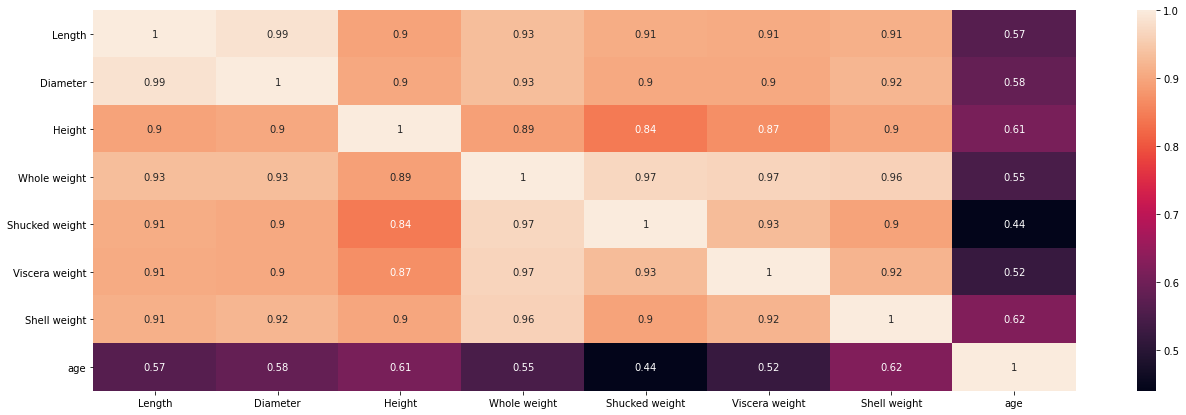

In [59]:
#Now lets plot heatmap based on the correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)

Checking columns which are positively correlated and negatively correlated with target column

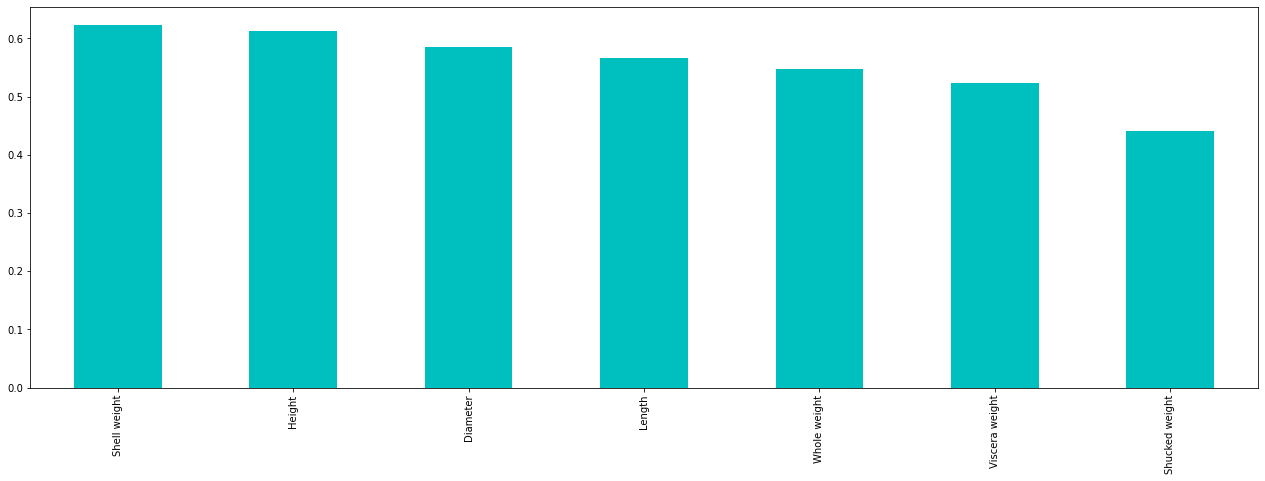

In [60]:
plt.figure(figsize=(22,7))
df.corr()['age'].sort_values(ascending=False).drop(['age']).plot(kind='bar',color='c')


Any column is not negatively correlated with age(target) column

In [61]:
df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
age               0.725464
dtype: float64

If considering +/-0.5 is the skewness range,no column is having skewness in the data

In [62]:
df.shape

(4027, 9)

In [63]:
Data_loss=((4177-4027)/4177)*100
Data_loss

3.5910940866650707

In [76]:
df=df.drop("Sex",axis=1)

In [77]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Separating the columns into features and targets

In [78]:
features=df.drop("age",axis=1)
target=df["age"]

Scaling the data using min max scaler

In [79]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [85]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing  accuracy is :-{r2_score(target_test,pred_test)}")
    print("\n")        

At random state 0,the training accuracy is :-0.5202917566934693
At random state 0,the testing  accuracy is :-0.4847325569333535


At random state 1,the training accuracy is :-0.5177925127351461
At random state 1,the testing  accuracy is :-0.49323974342352916


At random state 2,the training accuracy is :-0.5178273753915938
At random state 2,the testing  accuracy is :-0.49683296181369263


At random state 3,the training accuracy is :-0.5140849843375958
At random state 3,the testing  accuracy is :-0.5100341073832136


At random state 4,the training accuracy is :-0.5115040470803244
At random state 4,the testing  accuracy is :-0.5208240908907475


At random state 5,the training accuracy is :-0.5196975908267016
At random state 5,the testing  accuracy is :-0.4880127152405409


At random state 6,the training accuracy is :-0.5106601582234374
At random state 6,the testing  accuracy is :-0.5233738043168703


At random state 7,the training accuracy is :-0.5211948731384631
At random state 7,the te

At random state 81,the training accuracy is :-0.507767782872593
At random state 81,the testing  accuracy is :-0.5347815049520537


At random state 82,the training accuracy is :-0.49944145214785574
At random state 82,the testing  accuracy is :-0.5624244718393829


At random state 83,the training accuracy is :-0.5181589989394974
At random state 83,the testing  accuracy is :-0.49540187973739735


At random state 84,the training accuracy is :-0.5198292261912831
At random state 84,the testing  accuracy is :-0.48727810300974195


At random state 85,the training accuracy is :-0.5196527581164214
At random state 85,the testing  accuracy is :-0.4875249369082588


At random state 86,the training accuracy is :-0.5101620573821843
At random state 86,the testing  accuracy is :-0.5280732070811678


At random state 87,the training accuracy is :-0.5169768294918702
At random state 87,the testing  accuracy is :-0.4985980859595971


At random state 88,the training accuracy is :-0.5131279762027343
At random

In [86]:
#As every accuracy is atmost same with every random state,considering better among them which is 62
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=62)

In [87]:
lr.fit(features_train,target_train)

LinearRegression()

In [88]:
pred_test=lr.predict(features_test)

In [89]:
print(r2_score(target_test,pred_test))

0.567273324322028


## Cross Validation of the model

In [96]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.5094824858937593 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 3 the cv score is 0.49565653312425045 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 4 the cv score is 0.42079913386716633 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 5 the cv score is 0.41472280082211926 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 6 the cv score is 0.4265019701260826 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 7 the cv score is 0.4367255328621922 and accuracy score for training is -0.4878246627792133 and accuracy for testing is 0.567273324322028


At cross fold 8 the cv score is 0.3981480939372855 and accuracy score for

As the accuracy obtained and accuracy by the folds are almost same there is no over or under fitting

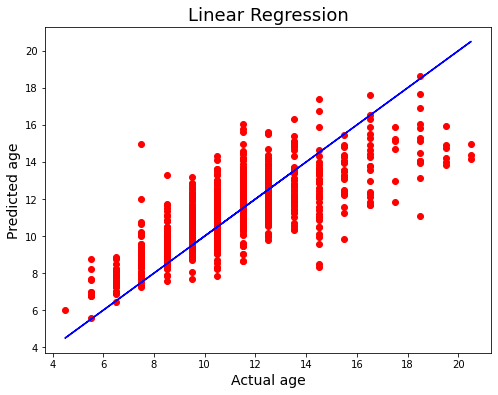

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel("Actual age",fontsize=14)
plt.ylabel("Predicted age",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [103]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [105]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.5675085433798079

In [106]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.41465013835064324

In [111]:
import pickle
filename='abalone.pkl'
pickle.dump(rf,open(filename,'wb'))


In [116]:
loaded=pickle.load(open('abalone.pkl','rb'))

In [117]:
lr.score(features_train,target_train)

0.5003518468562125